<a href="https://colab.research.google.com/github/gani0325/2022/blob/main/ObjectDetection/Mask_R_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고하였습니다.
- https://blog.paperspace.com/mask-r-cnn-in-tensorflow-2-0/

# Mask R-CNN
: 이미지의 객체에 대한 
클래스 레이블, 경계 상자 및 마스크를 예측

- mrcnn 이며 프로젝트의 소스 코드를 보유

In [1]:
import mrcnn.config

class SimpleConfig(mrcnn.config.Config):
	...

- TensorFlow 버전은 1.3.0 이상
- Keras의 경우 2.0.8 이상

In [22]:
import tensorflow
tensorflow.__version__

'1.13.1'

In [23]:
import keras
keras.__version__

'2.0.8'


## 이미지 객체 감지 단계
```
1) 모델 구성 매개변수를 준비합니다.
2) Mask R-CNN 모델 아키텍처를 구축합니다.
3) 모델 가중치를 로드합니다.
4) 입력 이미지를 읽습니다.
5) 이미지에서 물체를 감지합니다.
6) 결과를 시각화합니다.
```

### 1) 모델 구성 매개변수 준비

In [24]:
NUM_CLASSES = 1             # 클래스 수이며 기본값은 1
NUM_CLASSES = 81            # 총 클래스 수는 81개
GPU_COUNT = 1
IMAGES_PER_GPU = 1                            # 사용자가 단일 이미지에서 개체를 감지하는 데만 관심
BATCH_SIZE = IMAGES_PER_GPU * GPU_COUNT       # 배치 크기를 계산

- 구성 클래스의 전체 코드

In [3]:
import mrcnn.config

class SimpleConfig(mrcnn.config.Config):
	NAME = "coco_inference"

	GPU_COUNT = 1
	IMAGES_PER_GPU = 1

	NUM_CLASSES = 81

### 2) 마스크 R-CNN 모델 아키텍처 구축
```
1. mode: "training"또는 "inference".
2. config: 구성 클래스의 인스턴스입니다.
3. model_dir: 훈련 로그 및 훈련 가중치를 저장하는 디렉토리입니다.
```

- 클래스 의 인스턴스를 만든다

In [5]:
import mrcnn.model
import os

model = mrcnn.model.MaskRCNN(mode="inference", 
                             config=SimpleConfig(),
                             model_dir=os.getcwd())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


- 단 4개의 레이어만 나열
- 마지막 레이어 mrcnn_mask는 상위 100개 ROI에 대한 마스크만 반환

In [6]:
model.keras_model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_image (InputLayer)         (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, None, None, 3) 0           input_image[0][0]                
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, None, None, 64 9472        zero_padding2d_1[0][0]           
____________________________________________________________________________________________________
bn_conv1 (BatchNorm)             (None, None, None, 64 256         conv1[0][0]                      
___________________________________________________________________________________________

### 3) 모델 가중치 로드
```
1. filepath: 가중치 파일의 경로를 허용합니다.
2. by_name: True이면 이름에 따라 각 레이어에 가중치가 할당됩니다.
```

- weights 파일의 경로를 전달하면서 메소드를 호출

In [7]:
model.load_weights(filepath="/content/drive/MyDrive/가은대학/DATA/mask_rcnn_coco.h5", by_name=True)

### 4) 입력 이미지 읽기

- OpenCV를 사용하여 이미지를 읽고 색상 채널을 BGR이 아닌 RGB로 재정렬

In [8]:
import cv2

image = cv2.imread("/content/drive/MyDrive/가은대학/DATA/elephant.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### 4) 물체감지

```
1. images: 이미지 목록입니다.
2. verbose: 1로 설정하면 일부 로그 메시지가 인쇄됩니다.
```

- 인수 에 할당된 목록의 길이는 images배치 크기와 같아야함
- 각 입력 이미지에 대해 이 detect()메서드는 감지된 개체에 대한 정보가 들어 있는 딕셔러리를 반환

In [9]:
r = model.detect(images=[image], 
                 verbose=0)

In [10]:
r = r[0]

In [11]:
print(r.keys())

dict_keys(['rois', 'class_ids', 'scores', 'masks'])


```
rois: 감지된 각 개체 주변의 상자입니다.
class_ids: 개체의 클래스 ID입니다.
scores: 각 개체에 대한 클래스 점수입니다.
masks: 마스크.
```

### 6) 결과 시각화

- mrcnn.visualize.display_instances()기능은 탐지 상자, 마스크, 클래스 이름 및 점수를 표시하는 데 사용

```
image: 탐지 상자와 마스크가 그려진 이미지입니다.
boxes: 탐지 상자.
masks: 감지된 마스크입니다.
class_ids: 감지된 클래스 ID입니다.
class_names: 데이터세트의 클래스 이름 목록입니다.
scores: 각 개체에 대한 예측 점수입니다.
```

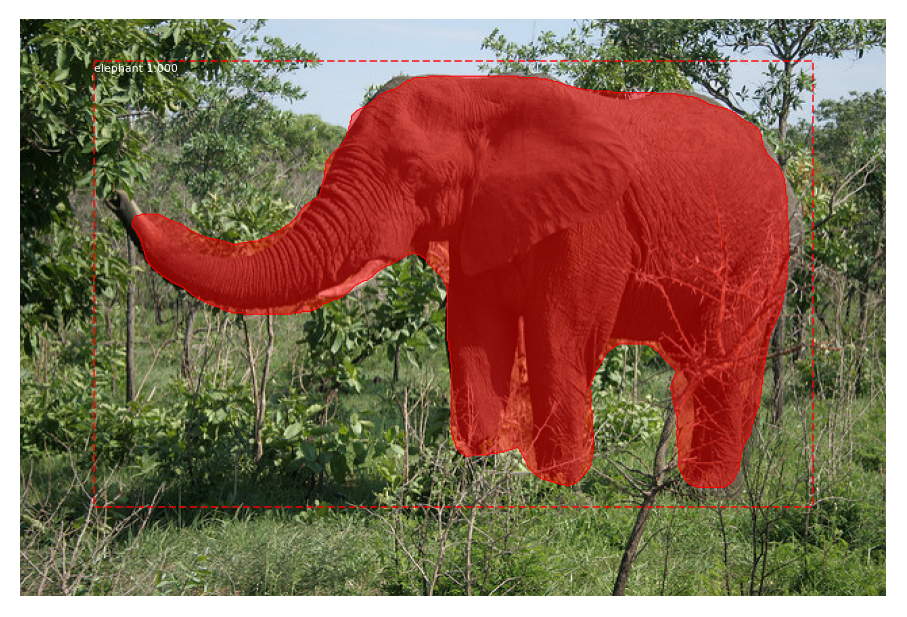

In [13]:
import mrcnn.visualize

CLASS_NAMES = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


mrcnn.visualize.display_instances(image=image, 
                                  boxes=r['rois'], 
                                  masks=r['masks'], 
                                  class_ids=r['class_ids'], 
                                  class_names=CLASS_NAMES, 
                                  scores=r['scores'])

- 함수가 실행되면 상자, 마스크, 클래스 점수 및 레이블이 그려지는 그림이 표시